In [27]:
import time
import random
from IPython.display import clear_output
import PIL.Image

from pdf2image import convert_from_path, convert_from_bytes
from pdf2image.exceptions import (
    PDFInfoNotInstalledError,
    PDFPageCountError,
    PDFSyntaxError
)
POPPLER_PATH = '../../../Documents/Software/Release-24.08.0-0/poppler-24.08.0/Library/bin'
import os
print(os.listdir(POPPLER_PATH))

['cairo.dll', 'charset.dll', 'deflate.dll', 'expat.dll', 'fontconfig-1.dll', 'freetype.dll', 'iconv.dll', 'jpeg8.dll', 'lcms2.dll', 'Lerc.dll', 'libcrypto-3-x64.dll', 'libcurl.dll', 'libexpat.dll', 'liblzma.dll', 'libpng16.dll', 'libssh2.dll', 'libtiff.dll', 'libzstd.dll', 'openjp2.dll', 'pdfattach.exe', 'pdfdetach.exe', 'pdffonts.exe', 'pdfimages.exe', 'pdfinfo.exe', 'pdfseparate.exe', 'pdftocairo.exe', 'pdftohtml.exe', 'pdftoppm.exe', 'pdftops.exe', 'pdftotext.exe', 'pdfunite.exe', 'pixman-1-0.dll', 'poppler-cpp.dll', 'poppler-glib.dll', 'poppler.dll', 'tiff.dll', 'zlib.dll', 'zstd.dll', 'zstd.exe']


Getting a list of all the PDF files in my PC:

In [ ]:
def get_files(dir, extension=None, verbose=True):
    total_files = 0
    file_paths = []
    iteration = 0
    for root, dirs, files in os.walk(dir):
        iteration += 1
        if extension:
            filtered_files = [f for f in files if f.lower().endswith(extension.lower())]
            if verbose and len(filtered_files) > 0:
                if iteration % 10 == 0:
                    clear_output(wait=True)
                print(f"{len(filtered_files)} {extension} files in {root}")
            total_files += len(filtered_files)
            file_paths.extend([os.path.join(root, f) for f in filtered_files])
        else:
            if verbose:
                print(f"{len(files)} files in {root}")
            total_files += len(files)
            file_paths.extend([os.path.join(root, f) for f in files])

    return total_files, file_paths

extension = '.pdf'
dir = 'C:/'
total_files, file_paths = get_files(dir=dir, extension=extension, verbose=True)

clear_output(wait=True)
time.sleep(1)
print(f"Total number of {extension} files: {total_files}")

Total number of .pdf files: 8834


Picking up a random file:

In [ ]:
random_file = random.choice(file_paths)
print(os.path.basename(random_file))

Profiting With Forex, The Most Effective Tools and Techniques for Trading Currencies - Jagerson, Hansen (2006) A30.pdf


Converting each page into a .jpg file:

In [25]:
pdf_file_path = random_file
filename = os.path.basename(random_file)

images=convert_from_path(pdf_file_path,
                         poppler_path=POPPLER_PATH)
for i in range(len(images)):
        images[i].save(f'imgs/pdf-to-img/{filename}_'+ str(i) +'.jpg', 'JPEG')

Displaying the first image:

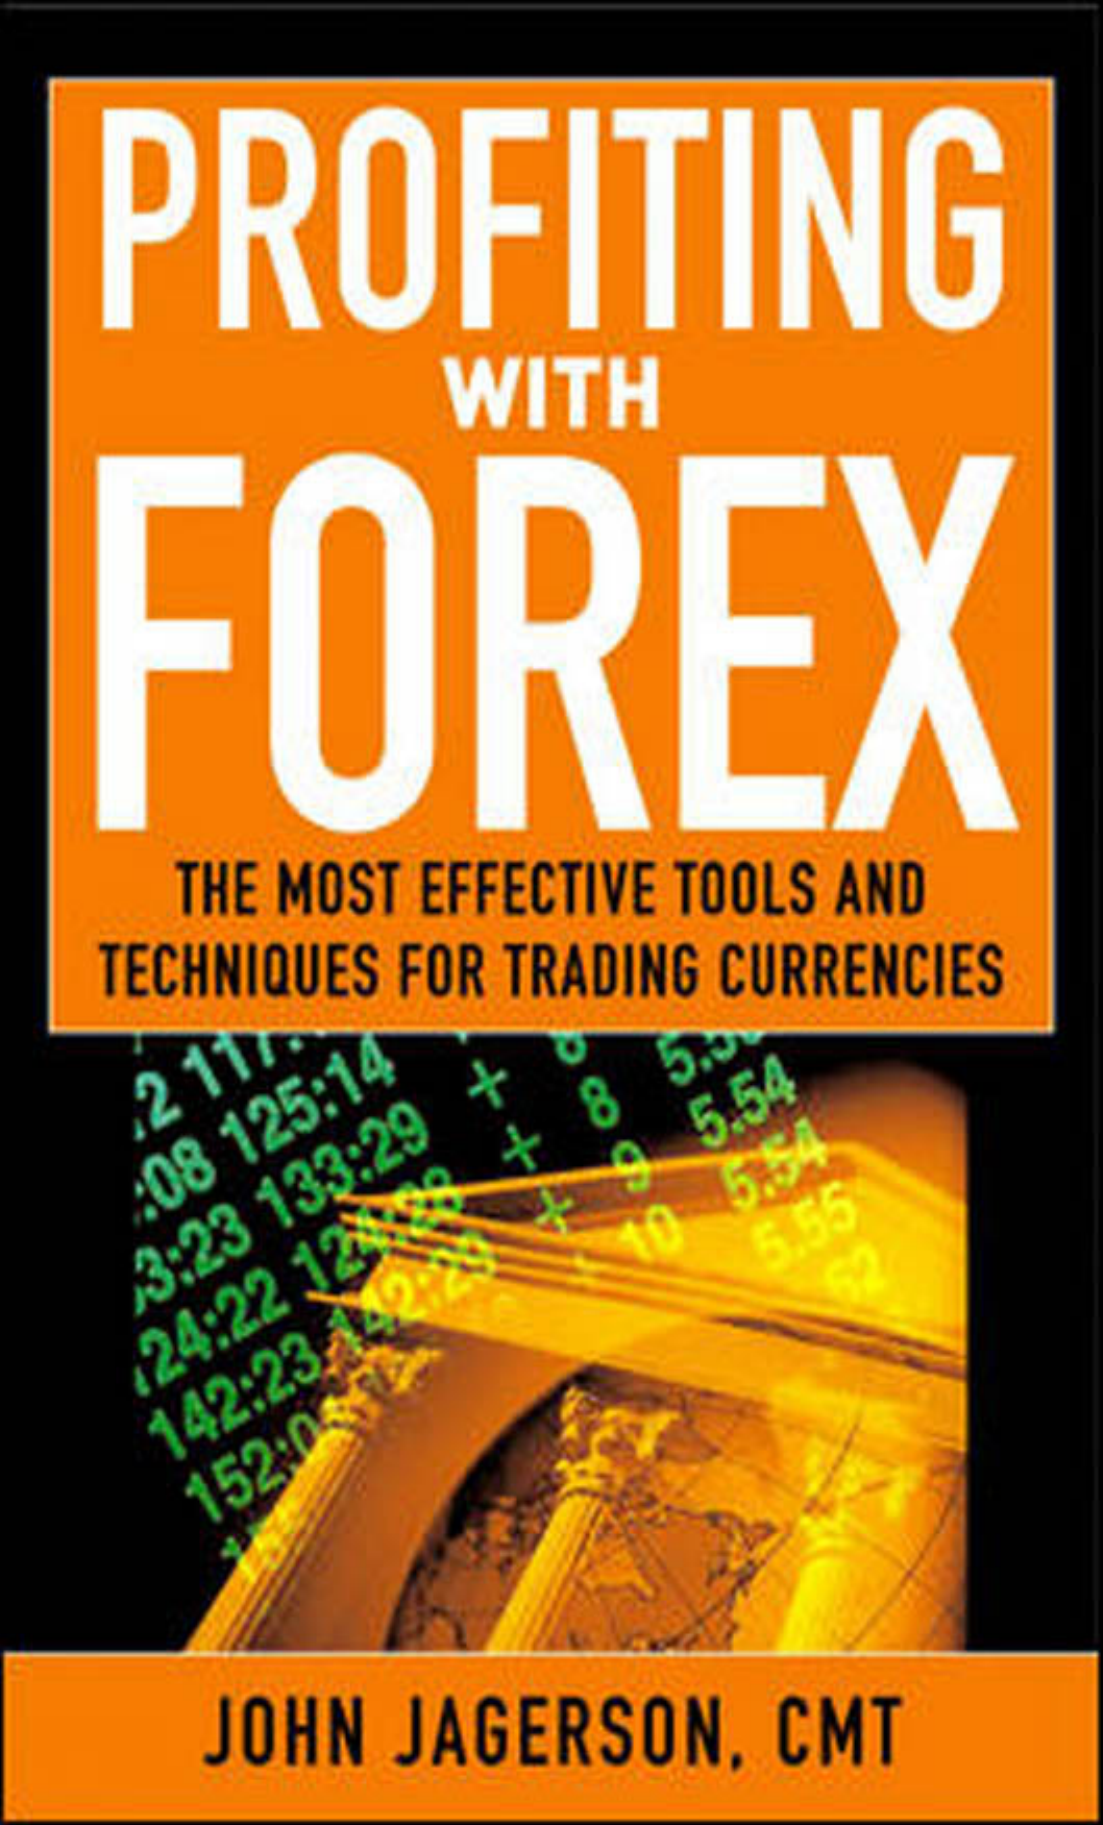

In [28]:
images[0]

Loading saved image:

In [32]:
random_page = random.choice(os.listdir('imgs/pdf-to-img'))

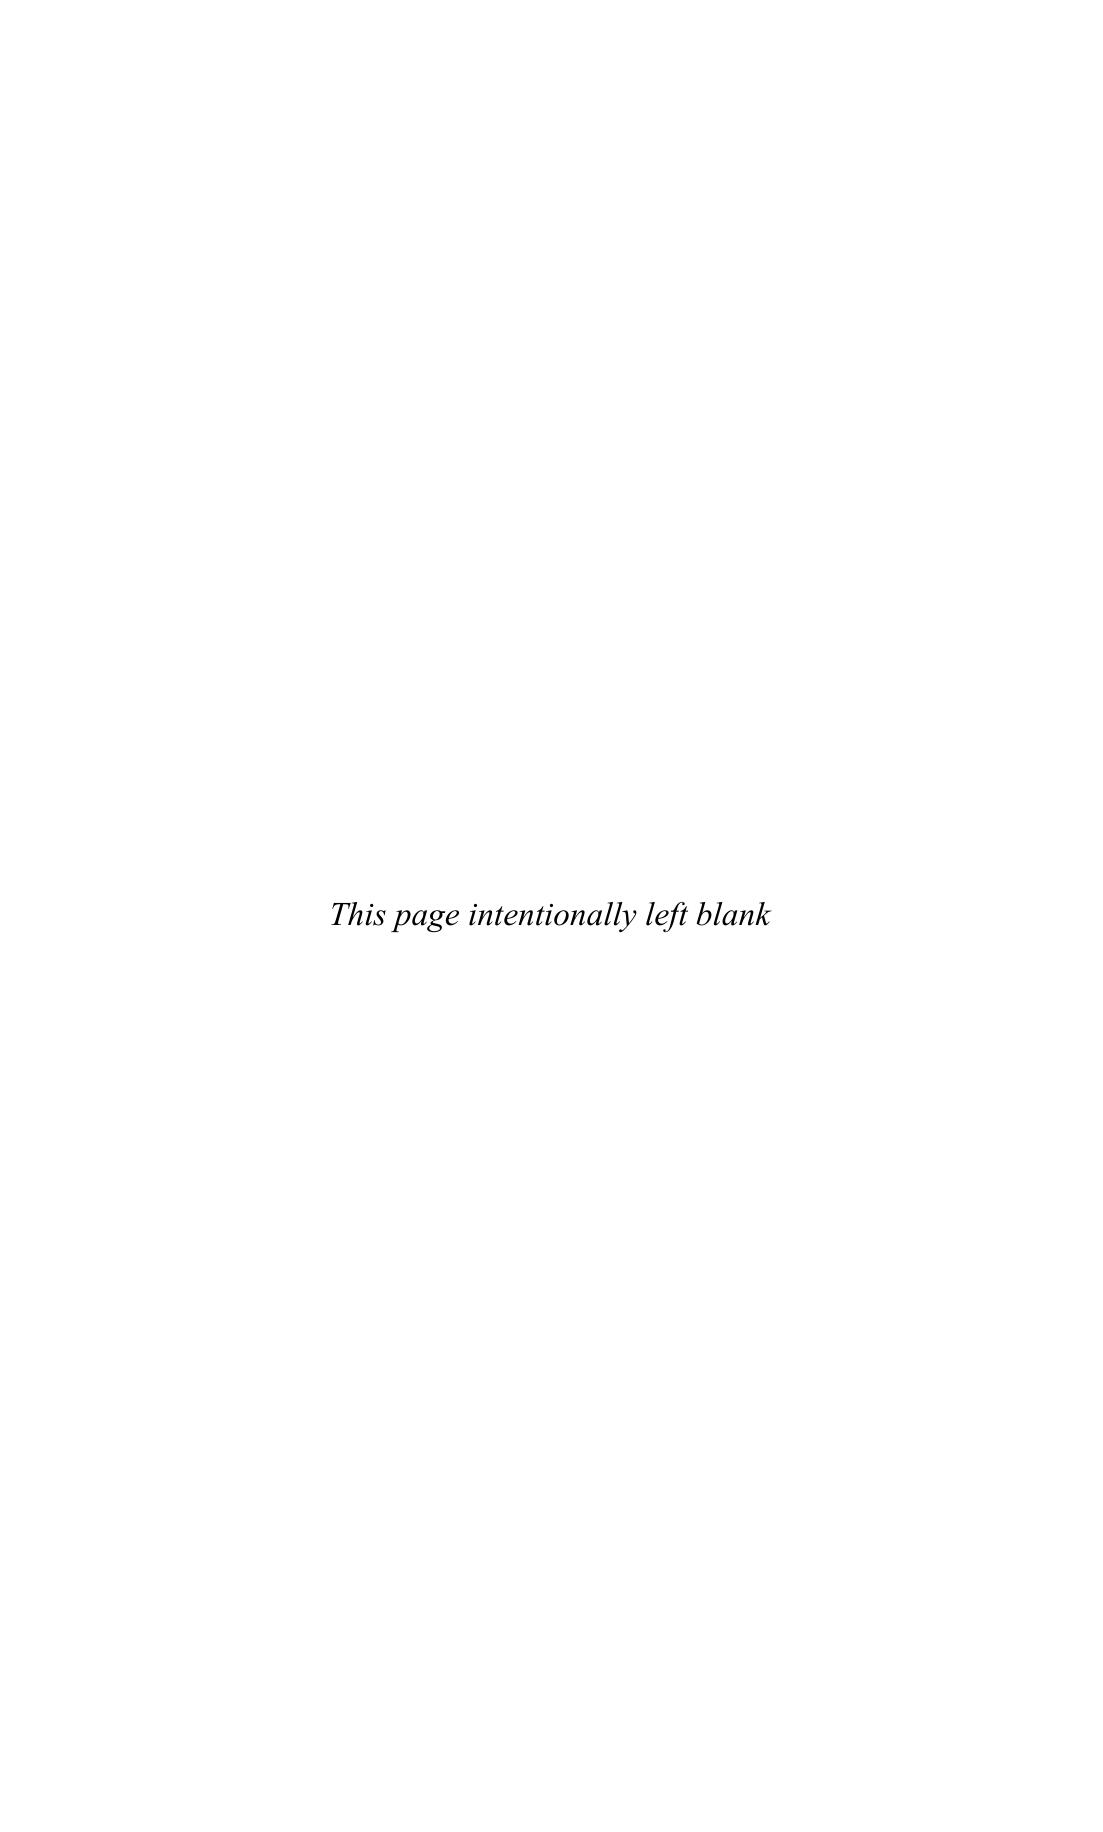

In [36]:
im = PIL.Image.open(f'imgs/pdf-to-img/{random_page}')
display_settings = {"image/png": {"width": 600}}
display(im, metadata=display_settings)

### More examples:

In [42]:
pdf_file_path = "../../../Documents/python_scripts/pdf_to_image/pdf/gh-readme-stats.pdf"
filename = pdf_file_path.split('/')[-1].split('.')[0]

images=convert_from_path(pdf_file_path,
                         poppler_path=POPPLER_PATH)
for i in range(len(images)):
        images[i].save(f'imgs/{filename}_'+ str(i) +'.png', 'PNG')

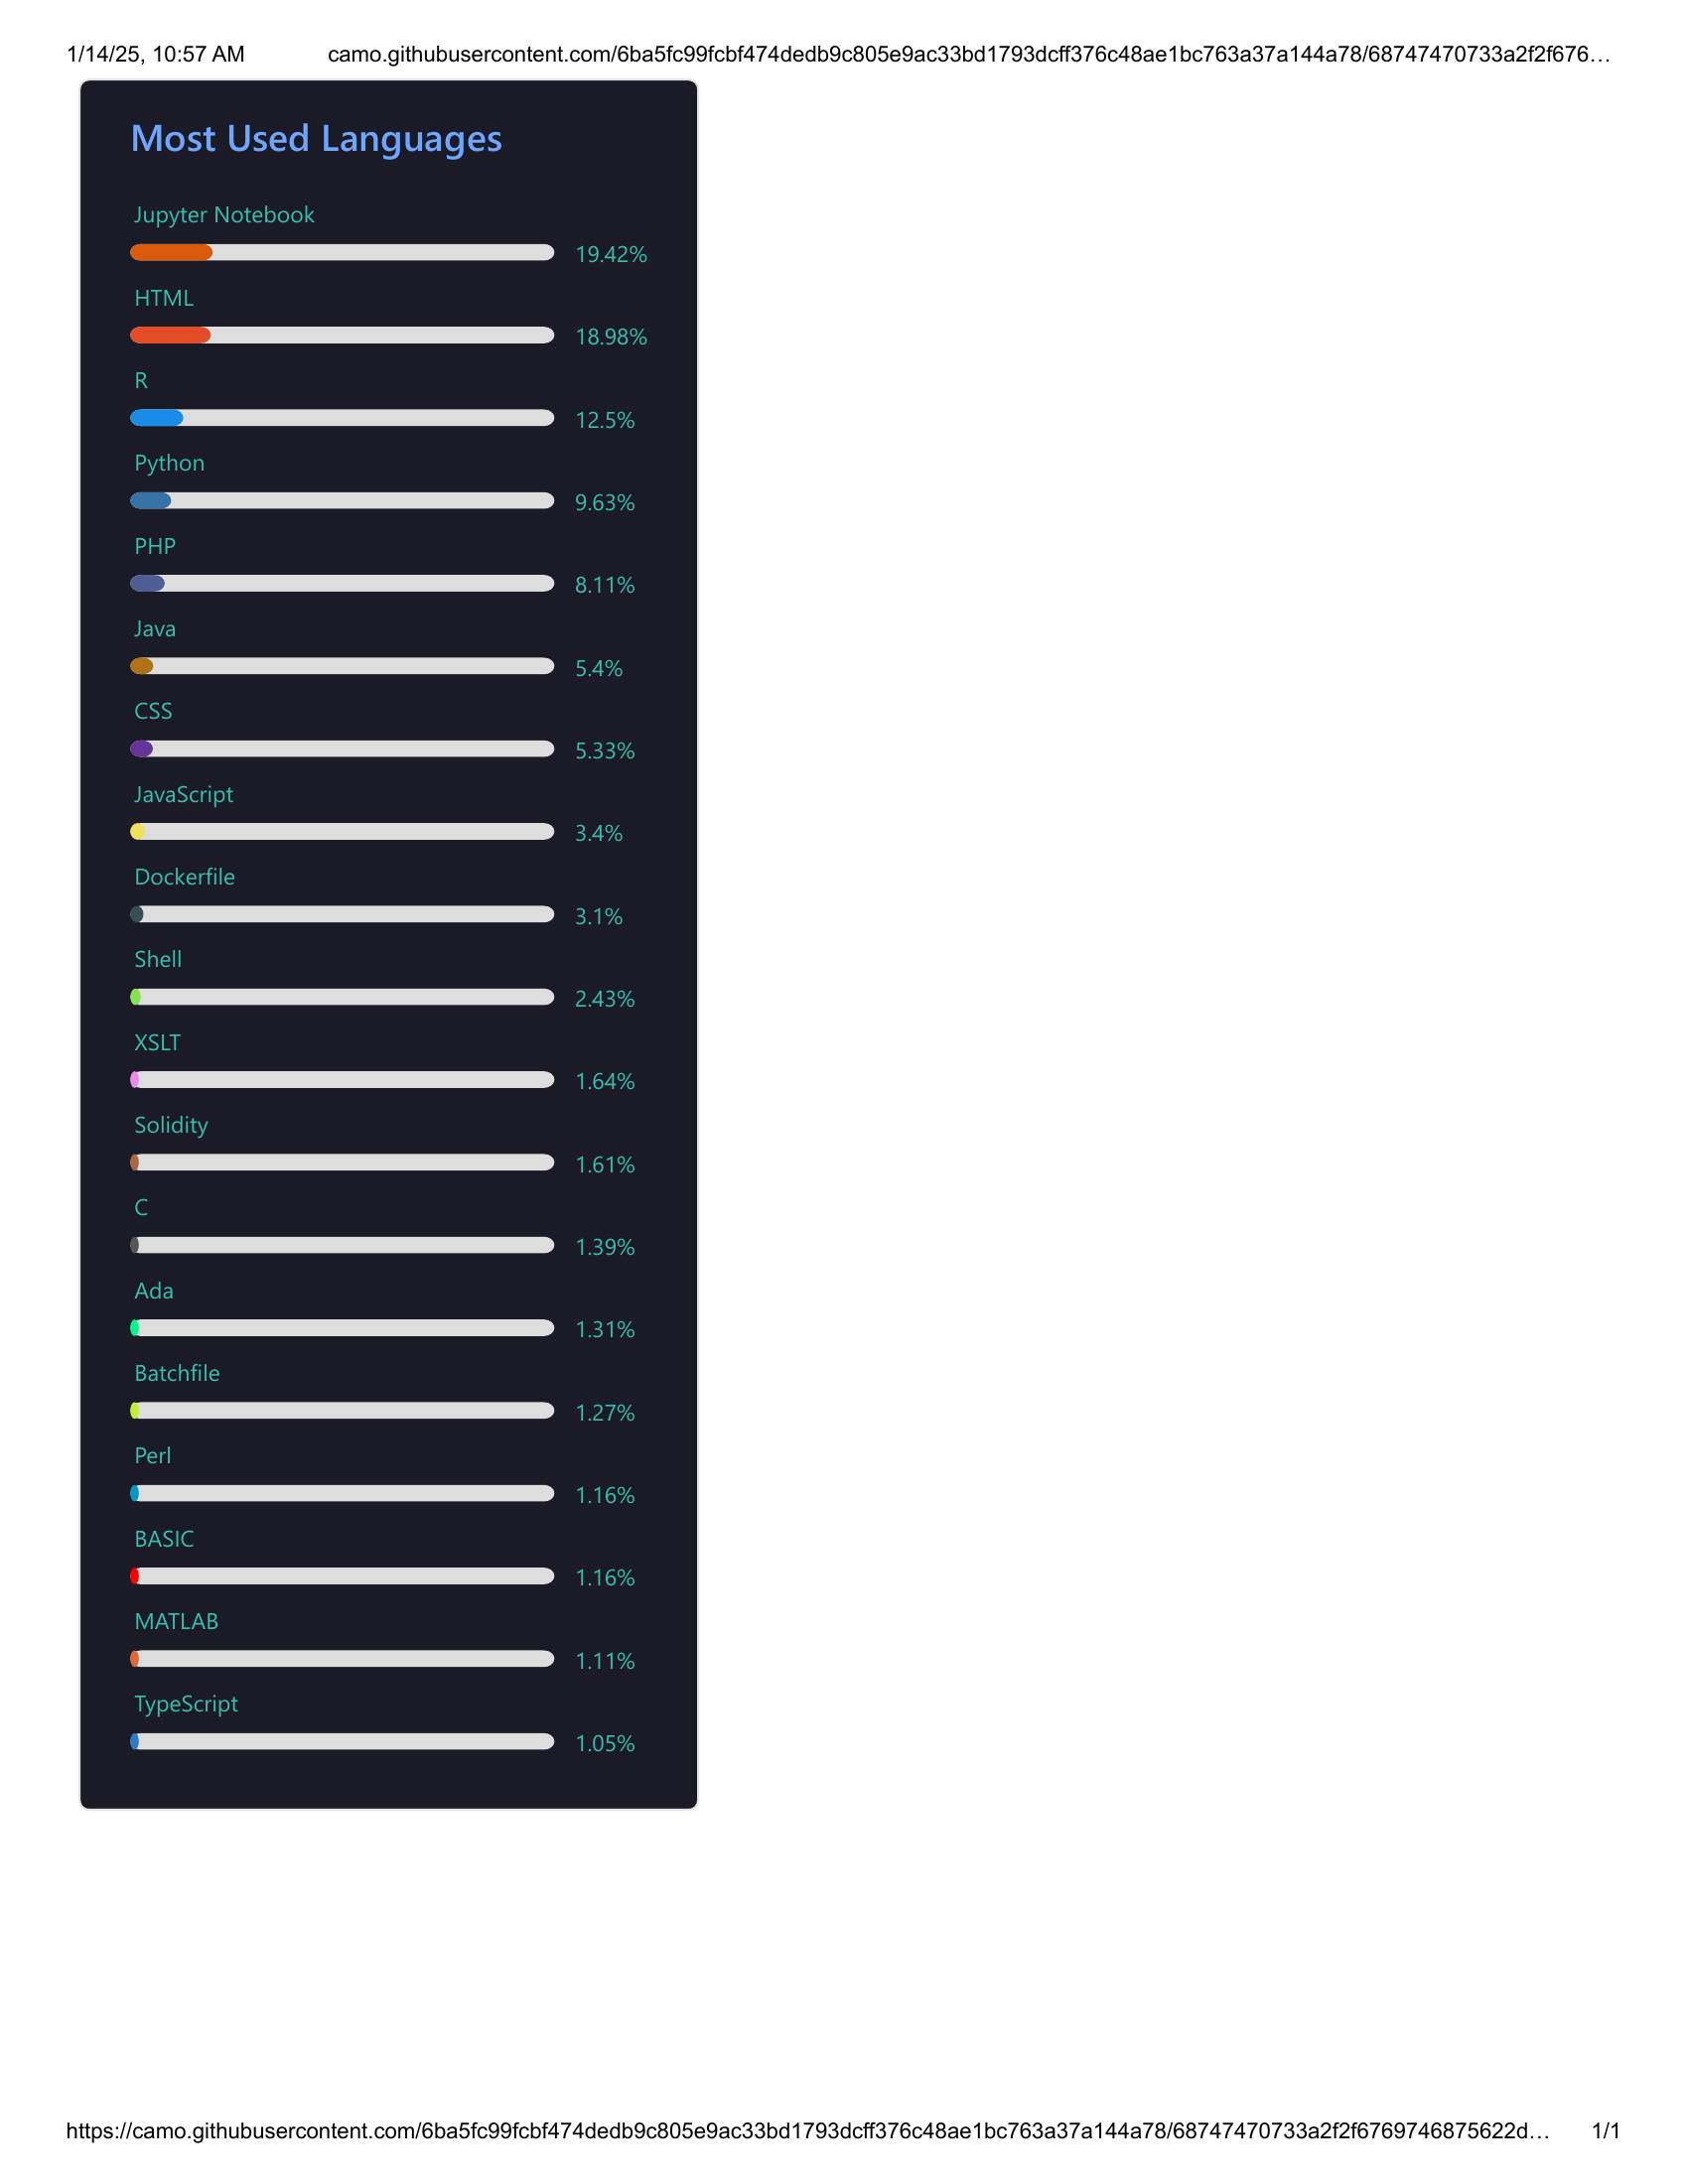

In [45]:
im = PIL.Image.open(f'imgs/gh-readme-stats_0.png')
display(im, metadata=display_settings)